In [3]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

In [8]:
len(data.dtypes)
len(data.columns)

4

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   capital-gain    48842 non-null  int64
 2   capital-loss    48842 non-null  int64
 3   hours-per-week  48842 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [12]:
data.isna().sum()

age               0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), LogisticRegression())
cv_results = cross_validate(model, data, target, cv = 10)
test_score1 = pd.Series(cv_results["test_score"])

dummy_model = make_pipeline(StandardScaler(), DummyClassifier(strategy = "most_frequent"))
cv_results = cross_validate(dummy_model, data, target, cv = 10)
test_score2 = pd.Series(cv_results["test_score"])

diff_scores = round((test_score1 - test_score2)*100, 2)
diff_scores

0    3.79
1    3.21
2    3.58
3    4.40
4    3.95
5    3.85
6    3.69
7    3.87
8    4.44
9    4.34
dtype: float64

In [32]:
# Solution
from sklearn.linear_model import LogisticRegression

model = make_pipeline(StandardScaler(), LogisticRegression())
cv_results = cross_validate(
    model, data, target, cv=10, return_estimator=True
)
cv_results["test_score"]
cv_results["test_score"].mean()

0.7998445658834604

In [33]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

dummy = DummyClassifier(strategy="most_frequent")
scores = cross_val_score(dummy, data, target, cv=10)
scores.mean()

0.7607182352166999

In [45]:
# Exo
coefs = [est[-1].coef_[0] for est in cv_results["estimator"]]
df = pd.DataFrame(coefs, columns = list(data.columns))
df.describe()

,age,capital-gain,capital-loss,hours-per-week
count,10.000000,10.000000,10.000000,10.000000
mean,0.521112,2.450798,0.306477,0.539318
std,0.003151,0.031122,0.002521,0.004075
min,0.516454,2.405087,0.301394,0.534597
25%,0.519503,2.442554,0.304690,0.535742
50%,0.521054,2.450486,0.307508,0.538944
75%,0.523479,2.464064,0.308289,0.541690
max,0.526067,2.512010,0.309170,0.546715


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

<AxesSubplot:>

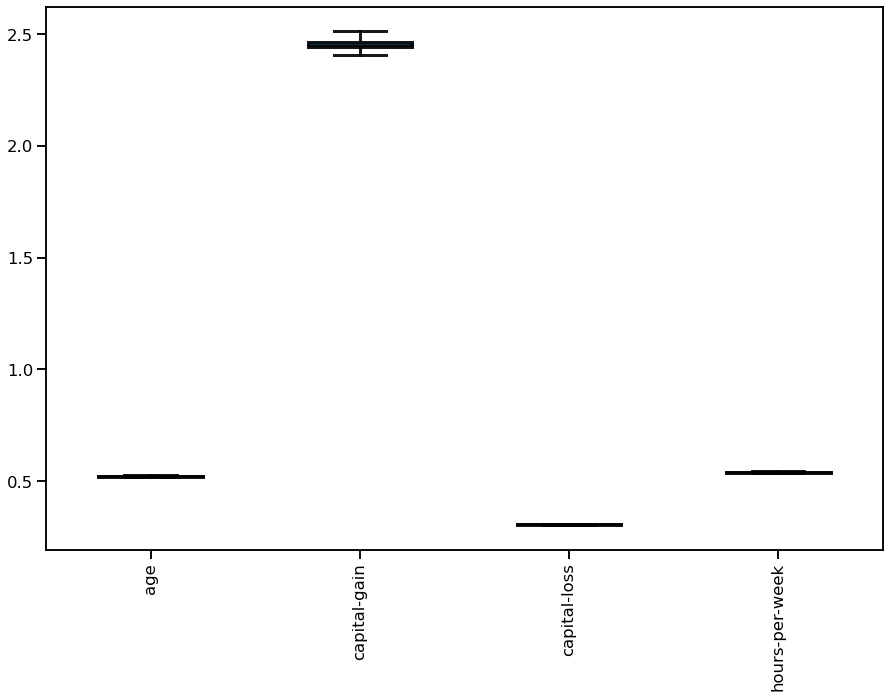

In [50]:
# Solution
coefs = [estimator[-1].coef_[0] for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=data.columns)
_, ax = plt.subplots(figsize=(15, 10))
coefs.abs().plot.box(**boxplot_property, ax=ax)

In [51]:
# Exo
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  48842 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [53]:
data.isna().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [57]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

print(numerical_columns, categorical_columns)

['age', 'capital-gain', 'capital-loss', 'hours-per-week'] ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [59]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [88]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('onehotencoder', categorical_preprocessor, categorical_columns),
    ('standardscaler', numerical_preprocessor, numerical_columns)])

# Model
model = make_pipeline(preprocessor, LogisticRegression(max_iter = 5000))
cv_results = cross_validate(model, data, target, cv = 10, return_estimator = True)

In [89]:
test_score3 = cv_results["test_score"]
((test_score3 - test_score1)*100).mean()

5.167665478822083

In [176]:
# Solution
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = selector(dtype_include=object)(data)
numerical_columns = selector(dtype_exclude=object)(data)

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_columns),
    (StandardScaler(), numerical_columns),
    remainder="passthrough"
)
model = make_pipeline(preprocessor, LogisticRegression(max_iter=5000))
cv_results = cross_validate(
    model, data, target, cv=10, return_estimator=True, n_jobs=2
)
cv_results["test_score"].mean()

0.8515212206716812

In [190]:
preprocessor.fit(data)

# Tests
preprocessor.named_transformers_
preprocessor.named_transformers_["onehotencoder"].get_feature_names()
preprocessor.named_transformers_["onehotencoder"].get_feature_names(categorical_columns)

# Feature names
feature_names = (preprocessor.named_transformers_["onehotencoder"]
                             .get_feature_names(categorical_columns)).tolist()
feature_names += numerical_columns
feature_names

['workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Fa

In [233]:
my_features = [
    "hours-per-week", 
    "native-country_ Columbia",
    "workclass_ ?",
    "native-country_ ?",
    "capital-gain", 
    "education_ Doctorate"
]

w = [i for i, elt in enumerate(feature_names) if elt in my_features]

coefs = [estimator[-1].coef_[0] for estimator in cv_results["estimator"]]
set([elt.shape for elt in coefs])

# On a des tailles de tableaux différentes

{(105,), (106,)}

In [206]:
data_transformed = preprocessor.transform(data)

model = LogisticRegression(max_iter = 5000)
model.fit(data_transformed, target)
coefs = model.coef_[0]
df = pd.DataFrame({"coef" : coefs}, index = feature_names).sort_values("coef", ascending = False)
df.head(3)

,coef
capital-gain,2.347711
education_ Doctorate,2.005359
education_ Prof-school,1.953166


[(106,), (106,), (106,), (106,), (106,), (106,), (106,), (105,), (106,), (106,)]


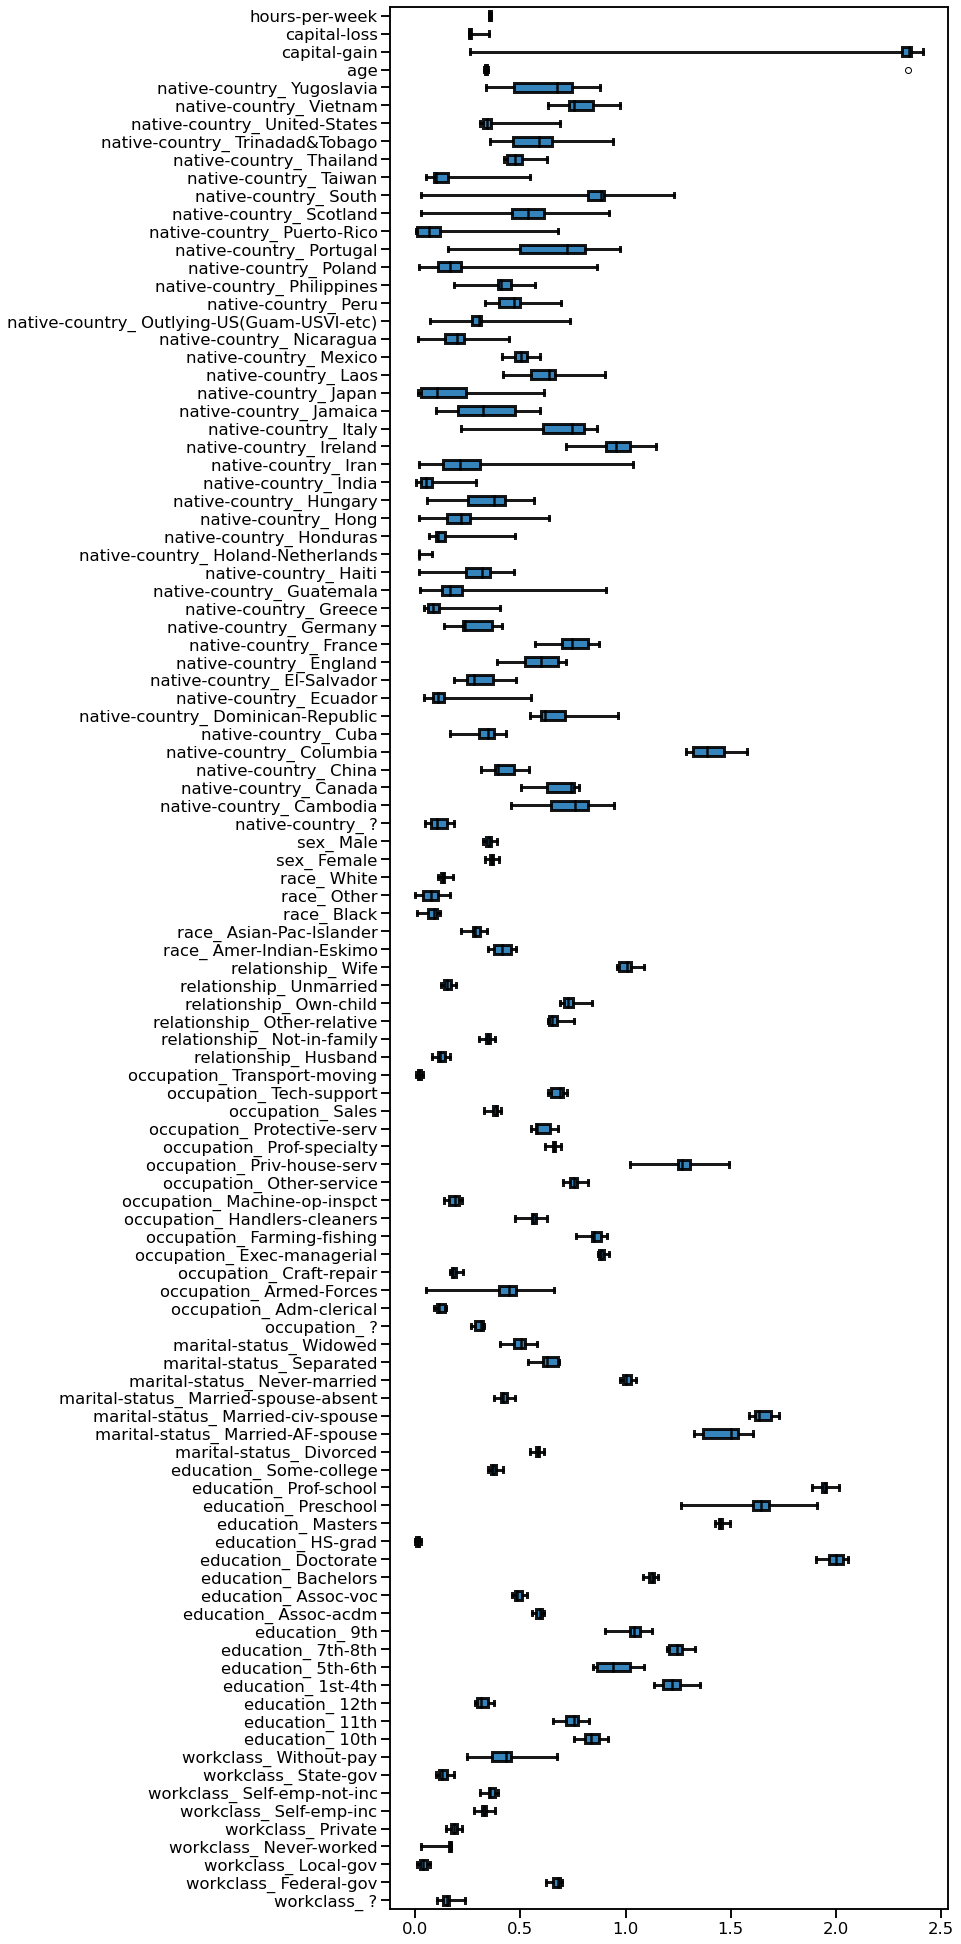

In [235]:
# Solution
coefs = [estimator[-1].coef_[0] for estimator in cv_results["estimator"]]
print([elt.shape for elt in coefs]) # Tailles différentes
coefs = pd.DataFrame(coefs, columns=feature_names)

# Define the style of the box style
boxplot_property = {
    "vert": False,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(10, 35))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

In [236]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 5000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [251]:
# Exo
Cs = Cs = [0.01, 0.1, 1, 10]

for my_C in Cs:
    print(my_C)
    model.set_params(C=my_C)
    model.fit(data_transformed, target)
    coefs = model.coef_[0]
    coefs = pd.Series(coefs)
    print("min", coefs.min(), "max", coefs.max(), "mean", coefs.mean(), "std", coefs.std())

0.01
min -0.6488582181122297 max 1.7524604292288943 mean 0.024976828475770256 std 0.3592838225252849
0.1
min -1.186180645379472 max 2.2552460193312234 mean 0.02992165168775864 std 0.5486172600038727
1
min -1.7117531073627827 max 2.3477112579393684 mean 0.03042126298831249 std 0.7283077777213095
10
min -3.5157503855474013 max 2.3611292117193363 mean 0.022566790367155247 std 0.8611123754096136


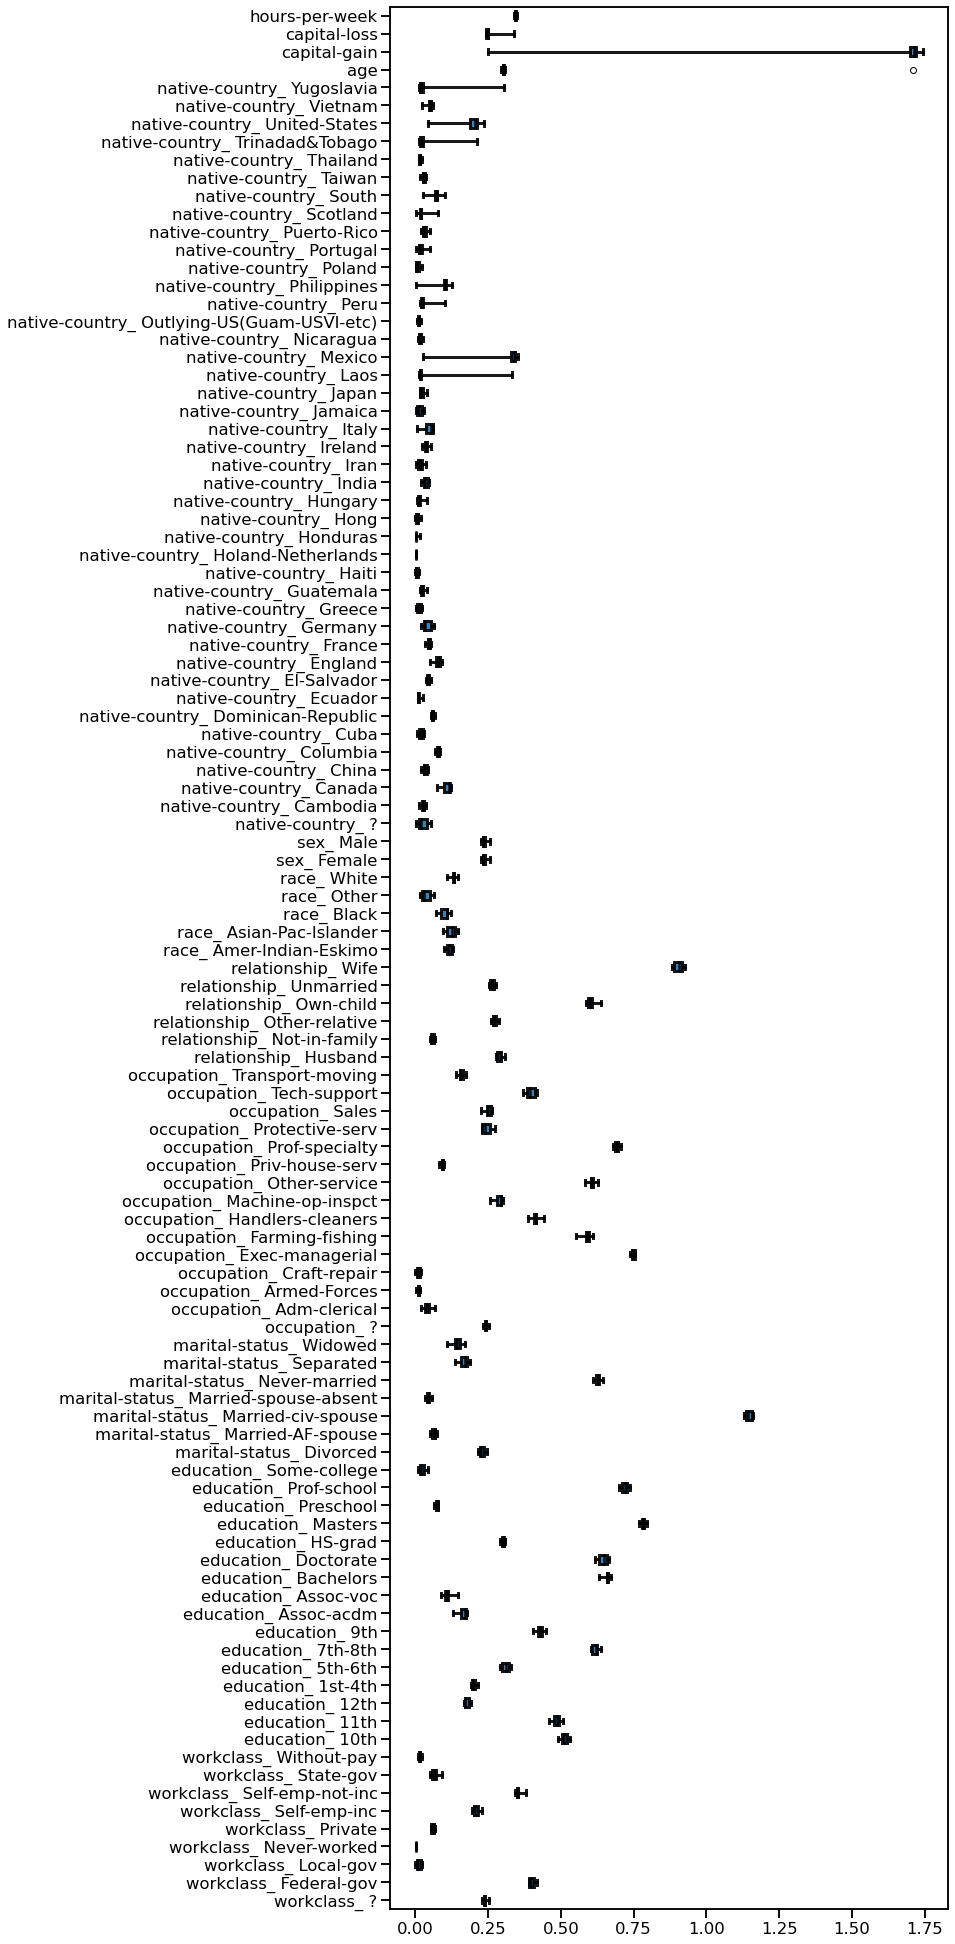

In [252]:
# Solution
model = make_pipeline(
    preprocessor, LogisticRegression(C=0.01, max_iter=5000)
)
cv_results = cross_validate(
    model, data, target, cv=10, return_estimator=True, n_jobs=2
)
coefs = [estimator[-1].coef_[0] for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=feature_names)
_, ax = plt.subplots(figsize=(10, 35))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)